# Data Wrangling project for Twitter account ( WeRateDogs )


In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import os
import timeit
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime
from IPython.display import Image



## 1.Gather Data

#### The begin the data wrangling process of this project, There is need to first acquire the needed data that is to be analysed. 
> In this project, I will work on 3 dataset:
>
> 1) The Twitter Enhanced archive provided in csv format
>
> 2) The tweet image predictions provided via a urls hosted on the Udacity Server.
>
> 3) Data from the Twitter API via the JSON query library

##### Read the Twitter Enhanced archive to dataframe

In [2]:
archive_tweet = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive_tweet


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#####  Read the Tweet image prediction for the udacity server using the request function

In [4]:
#Read the Tweet image prediction for the udacity server using the request function
url= ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response = requests.get(url)

## create a file for the data in os
with open(url.split('/')[-1],mode= 'wb') as file:
    file.write(response.content)
    

In [5]:
#Read the image prediciton TSV file into dataframe
img_prediction = pd.read_csv('image-predictions.tsv',sep = '\t')


In [6]:
img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Query Twitter API using Python's Tweepy Library and download to JSON file

In [7]:
# Create a function to prevent the json.text file from re-downloading if avaliable
if os.path.exists('tweet_json.txt'):
    print("The dataset has been downloaded already and written into the tweet_json.txt file.")
else:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
    consumer_key = "HIDDEN KEY"
    consumer_secret = "HIDDEN SECRET"
    access_token = "HIDDEN ACCESS TOKEN"
    access_token_secret = "HIDDEN  ACCESS SECRET"

#Create the Twitter API object and set rate limit
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = archive_tweet.tweet_id.values
    len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
      for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.errors.TweepyException as e:
                print("Fail")
                fails_dict[tweet_id] = e
            pass
        
        
    end = timer()
    print(end - start)
    print(fails_dict)

The dataset has been downloaded already and written into the tweet_json.txt file.


In [8]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
#print out one json object for further reference 
#tweets[0]   

In [9]:
#creat a list of data from tweet_json.txt
list_twits = []
for json_data in tweets:
    list_twits.append({'tweet_id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})
   
#creat a Dataframe
api_json_tweet = pd.DataFrame(list_twits, columns = ['tweet_id', 'retweet_count' , 'favorite_count']) 
#Check out the obatined DataFrame
api_json_tweet.head() 

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7044,33902
1,892177421306343426,5320,29393
2,891815181378084864,3500,22108
3,891689557279858688,7254,37018
4,891327558926688256,7797,35396


## Assessing  the Gathered Data

###### 1) Access Enhanced Twitter Archive dataset

In [10]:
#See the info of the Twitter archievd data
archive_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#check the info for the enhanced twitter archives.
archive_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
#get a summary stats of the archive_tweet df
archive_tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#Check the text column values
archive_tweet['text'].value_counts()

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                      1
Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN       1
This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P                               1
With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP                                                                        1
Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy    1
                                                                                                                                                  ..
This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT                        

In [14]:
archive_tweet['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [15]:
#View the rating denominator higher than 10 with 10 being the most ratings score
archive_tweet.loc[archive_tweet['rating_denominator']>10].sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


In [16]:
#View the value count for both ratings to see average ratings per count
archive_tweet[['rating_numerator','rating_denominator']].value_counts().head(10)

rating_numerator  rating_denominator
12                10                    558
11                10                    463
10                10                    461
13                10                    351
9                 10                    156
8                 10                    102
7                 10                     54
14                10                     54
5                 10                     37
6                 10                     32
dtype: int64

In [17]:
#View the rating numerator higher than 15 with 15 being the most ratings score
archive_tweet.loc[archive_tweet['rating_numerator']>12].sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
435,820446719150292993,NaN,NaN,2017-01-15 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Peaches. She's the ulti...,8.001414e+17,4.196984e+09,2016-11-20 00:59:15 +0000,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None


In [18]:
archive_tweet['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
archive_tweet['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [20]:
archive_tweet.loc[archive_tweet['name']=='my']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None


In [21]:
#check for name with None value
archive_tweet.loc[archive_tweet['name']=='None'].sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
467,817120970343411712,NaN,NaN,2017-01-05 21:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817120970...,13,10,None,None,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None


###### 2) Access Image prediction dataframe

In [22]:
#See the info of the image prediction dataset

img_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1467,778748913645780993,https://pbs.twimg.com/media/Cs6r_-kVIAALh1p.jpg,1,Staffordshire_bullterrier,0.351434,True,boxer,0.201478,True,American_Staffordshire_terrier,0.142838,True
1174,737322739594330112,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,1,guinea_pig,0.148526,False,solar_dish,0.097183,False,park_bench,0.059312,False
1896,850145622816686080,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,2,tennis_ball,0.714798,False,kelpie,0.105390,True,malinois,0.058553,True
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
648,681694085539872773,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,toy_poodle,0.920992,True,miniature_poodle,0.060857,True,Maltese_dog,0.006064,True


In [23]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
img_prediction.loc[img_prediction['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [25]:
#View the image of p1 conf vaule = False
img_prediction.loc[2026,'jpg_url']

'https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg'

In [26]:
Image(url= 'https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg')

In [27]:
img_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
img_prediction[['p1_dog','p2_dog','p3_dog']].value_counts()

p1_dog  p2_dog  p3_dog
True    True    True      1243
False   False   False      324
True    True    False      155
False   True    True       101
True    False   True        91
False   False   True        64
        True    False       54
True    False   False       43
dtype: int64

In [29]:
#Compare tweet IDs from both the archive tweet and the image prediction tweet ID
#True = common
#False = different
        
archive_tweet['tweet_id'].isin(img_prediction['tweet_id']).value_counts()


True     2075
False     281
Name: tweet_id, dtype: int64

In [30]:
#check for duplicate tweet ID
img_prediction['tweet_id'].duplicated().sum()

0

###### 3) Access API JSON dataframe


In [31]:
api_json_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7044,33902
1,892177421306343426,5320,29393
2,891815181378084864,3500,22108
3,891689557279858688,7254,37018
4,891327558926688256,7797,35396


In [32]:
archive_tweet['tweet_id'].isin(api_json_tweet['tweet_id']).value_counts()
#True = common
#False = different

True     2326
False      30
Name: tweet_id, dtype: int64

In [33]:
api_json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [34]:
all_columns = pd.Series(list(archive_tweet) + list(img_prediction) + list(api_json_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

We observer that Enhance twitter archive has a total entires of 2356, Image prediction datafram has entries of 2075 while the Tweet Json.txt dataframe has an entries of 2326 . It imply that we may have tweet_id that isn't present in the Image prediction datafram and Tweet Json.txt as the number of rows do not fully corrolation with the number of rows in the Enhance twitter archive

## Udacity specifications:

- "you only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets"

Only original ratings (no retweets) that have images are considered. Observations for Retweet and Reply is present : those with values in (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) and (in_reply_to_status_id, in_reply_to_user_id) respectively to be avoided,



#### QUALITY ISSUES

#### `Archive_tweet` table

- Source colume display https( HTML) ref addresss as source which is Wrong value 

- Timestamp column has wrong data type and Time has inaccurate value of +0000.


- The dog 'Name' column has 745 "None" as value and 57 name values as  "a",'my' and 'o'
- The rating_numerator score range from 1- 15 in 2326 cases out  2356 cases, the other values are outliers with the Max score    being 1776.

- The rating_denominator score is 10 in 2333 cases out 2356 cases, other values are regaded as outliers

-  Delete rows without Image url 



#### `Img_prediction` Table

- The Retweet_count and Favorite_count has index entries of 1986

- Drop columns which are not needed in the analysis, e.g, retweet_count, favorite_count, p1_conf,p2_conf etc

- image predicitons has 2075 photo rows instead of 2356 rows in Ehnanced twitter archive
- Some breed name starts with Upper case, others with lower case (p1,p2,p3)
- Image prediction has false values in P1 conf, P2_ conf and P3_conf, which indicate that image not dog



#### TIDINESS ISSUES:

- Text column contains html and rating score 

- Each category in Stages of dog as separate column : doggo, floofer, pupper, puppo

- Tweet_ids matches same on all 3 obervation documents. Merge all Tweet_ID to Archive tweet column 

- Multiple NAN values in column ( in_reply_to_status_id, in_reply_to_user_id,  retweeted_status_id, retweeted_status_user_id,    retweeted_status_timestamp)



## Clean

In [35]:
#first make copies of datasets: 

archive_tweet_clean = archive_tweet.copy()
img_prediction_clean = img_prediction.copy()
api_json_tweet_clean = api_json_tweet.copy()

## Clean TIDINESS ISSUES:

### Q1. Define

The Text in the text column contains html link to the tweet and the rating numerator and denominator which is already contained in  seperate columns. (Expanded urls column for the html link, ranking nunumerator and denominator for ranking score)

Action to be taken are

a) Extract the html and ratings_score from the text and assign to a new column.

b) Split the html and the ratings element from the text 

c) Drop the html column and ranking scores as the link to the tweet  and score are already contained in a different column


#### Code

In [36]:
#Extract the html link contained in the text into a new colunm "Texthtml"
archive_tweet_clean['texthtml'] = archive_tweet_clean['text'].str.extract('(https:\/{2}\w+\.\w+\/\w+)')
# split the html from the text link as this has already been extracted.
archive_tweet_clean['text']=archive_tweet_clean.text.str.split('(https:\/{2}\w+\.\w+\/\w+)').str[0]
#drop the html column as this is already contained in the expanded url column
archive_tweet_clean.drop(['texthtml'], axis=1, inplace=True)


In [37]:
##Extract the dog numerator and denominator contained in the text into a new colunm "text_ratings"
archive_tweet_clean['text_ratings'] = archive_tweet_clean['text'].str.extract('(\d+\/\d+)')
#Split the dog numerator and denominator contained in the text 
archive_tweet_clean['text']=archive_tweet_clean.text.str.split('(\d+\/\d+)').str[0]
archive_tweet_clean.drop(['text_ratings'], axis=1, inplace=True)

#### Test

In [38]:
list(archive_tweet_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [39]:
archive_tweet_clean['text'].value_counts().sample(5)

This is Maks. Maks just noticed something wasn't right.                                                       1
Nothing better than a doggo and a sunset.                                                                     1
This is Django. He's a skilled assassin pupper.                                                               1
ER... MER... GERD                                                                                             1
RT @dog_rates: This is Peaches. She's the ultimate selfie sidekick. Super sneaky tongue slip appreciated.     1
Name: text, dtype: int64

In [40]:
archive_tweet_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1420,698262614669991936,NaN,NaN,2016-02-12 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He's a yoga master. Trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698262614...,11,10,Franklin,None,None,None,None
527,808733504066486276,NaN,NaN,2016-12-13 18:01:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper in a onesie. Quite pupset abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808733504...,12,10,None,None,None,pupper,None
1993,672609152938721280,NaN,NaN,2015-12-04 02:51:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Caryl. Likes to get in the microwave.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672609152...,9,10,Caryl,None,None,None,None
692,787111942498508800,NaN,NaN,2016-10-15 02:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carl. He's very powerful.,7.529324e+17,4.196984e+09,2016-07-12 18:27:35 +0000,"https://vine.co/v/OEppMFbejFz,https://vine.co/...",12,10,Carl,None,None,None,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None


### Q2. Define


Merge each category in Stages of dog  colume( doggo, floofer, pupper, puppo) to one column for observation

#### Code

In [41]:
#extract the stage and append it to a new column call Dog stages
archive_tweet_clean['Dog_stages']= archive_tweet_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [42]:
# Replace all empty or NAN input in the dog staage to No stage
archive_tweet_clean['Dog_stages']= archive_tweet_clean['Dog_stages'].replace(np.nan, 'No stage', regex=True)

In [43]:
#drop the 'doggo','floofer','pupper','puppo' column that has already been merged to Dog stages
archive_tweet_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [44]:
archive_tweet_clean['Dog_stages'].value_counts()

No stage    2071
pupper       173
doggo         84
puppo         25
floofer        3
Name: Dog_stages, dtype: int64

In [45]:
archive_tweet_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages
964,750506206503038976,NaN,NaN,2016-07-06 01:46:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750506206...,8,10,Malcolm,No stage


### Q3. Define

Merge the dataframe into the Enhance Twitter archive dataframe using the tweet_id present in all as i the contain of all dataframe are relational

#### Code

In [46]:
#Merge the image prediction archive to the Enhance twitter datafram
archive_tweet_clean = pd.merge(archive_tweet_clean, img_prediction_clean,
                            on=['tweet_id'], how='left')

#Merge the image prediction archive to the Enhance twitter datafram 
archive_tweet_clean = pd.merge(archive_tweet_clean, api_json_tweet,
                            on=['tweet_id'], how='left')


#### Test

In [47]:
archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  Dog_stages                  2356 

### Q4 Define



Drop column ( in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) as our analysis is focused on the original tweets only. the total value is 181 retweet_Id


#### Code

In [48]:
archive_tweet_clean=archive_tweet_clean[archive_tweet_clean.retweeted_status_id.isnull()]
#Drop the columns with multiple NAN which is not needed for the analysis
archive_tweet_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                          'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)


In [49]:
archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   Dog_stages          2175 non-null   object 
 9   jpg_url             1994 non-null   object 
 10  img_num             1994 non-null   float64
 11  p1                  1994 non-null   object 
 12  p1_conf             1994 non-null   float64
 13  p1_dog              1994 non-null   object 
 14  p2                  1994 non-null   object 
 15  p2_conf             1994 non-null   float64
 16  p2_dog

## CLEAN QUALITY ISSUES

### Q1. Define

Source column display http ref address which is an inaccurate representation of the actual tweet source. The tweet define the device used for tweet. Step are to extact the tweet source from the http address.

The source column looks unclean


#### Code

In [50]:
#get the values counts of all tweet source
archive_tweet_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [51]:
# create a list of source devices used for tweet

Sources = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
            '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
             '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 
             '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

# To make a new Source list

Real_Source = ['Tweet from IPhone', 'Tweet from Vine', 'Twitter Web Client', 'Tweet from TweetDeck']

In [52]:
#replace the output for the old tweet source colum to new Tweet Source column
archive_tweet_clean.replace(Sources, Real_Source,inplace=True)

#### Test

In [53]:
#test code
archive_tweet_clean['source'].value_counts()

Tweet from IPhone       2042
Tweet from Vine           91
Twitter Web Client        31
Tweet from TweetDeck      11
Name: source, dtype: int64

### Q2. Define


Fix timestamp Column with right dtype (datetime) and correct inaccurate time value of +0000



#### Code

In [54]:
#use time.strip to fix +0000
archive_tweet_clean.timestamp = archive_tweet_clean.timestamp.str[:-5].str.strip()

In [55]:
#convert format to datetime 
archive_tweet_clean['timestamp']=pd.to_datetime(archive_tweet_clean['timestamp'])

#### Test

In [56]:
archive_tweet_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
730,781661882474196992,2016-09-30 01:08:10,Tweet from IPhone,Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,No stage,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,...,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,2540.0,9901.0


In [57]:
archive_tweet_clean['timestamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2175 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2175 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.0 KB


### Q4. Define


Correct the dog name value 'None', 'a','my' and 'o' to NaN value as this does not represent a dog names


#### Code

In [58]:
#convert the name column values to title 
archive_tweet_clean["name"]= archive_tweet_clean["name"].str.title()

In [59]:
#change the 'None' and 'a','my'and '0' to a NaN for better representation
archive_tweet_clean["name"].replace({"None": "No Name", "A": "No Name", 'My':' No Name','O':'No Name'},inplace=True)

#### Test

In [60]:
archive_tweet_clean["name"].sort_values()


852      No Name
1021        Abby
1035        Abby
938          Ace
1933        Acro
          ...   
115         Zoey
2141        Zoey
8           Zoey
151        Zooey
1875        Zuzu
Name: name, Length: 2175, dtype: object

### Q5. Define

The rating_numerator score range from 1- 15 is 2331 cases out  2356 cases, the other values are outliers with the Max score    being 1776. This indicate that we have 25 outliers

Change all score range higher than(outliers) 15 to 15

#### Code

In [61]:
archive_tweet_clean['rating_numerator'].count()

2175

In [62]:
#recheck for numerator scores higher than 15 
archive_tweet_clean.loc[archive_tweet_clean['rating_numerator']>15].sample()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
313,835246439529840640,2017-02-24 21:54:03,Tweet from IPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,No Name,No stage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,1995.0


In [63]:
#convert all values in rating_numerator higher than 15 to 15
archive_tweet_clean.loc[archive_tweet_clean['rating_numerator']>15,'rating_numerator']=15

#### Test

In [64]:
archive_tweet_clean['rating_numerator'].value_counts(ascending=[False])

12    500
10    442
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
15     26
3      19
4      17
2       9
1       8
0       2
Name: rating_numerator, dtype: int64

### Q6. Define

The rating_denominator score is 10 in 2333 cases out 2356 cases, other values are regaded as outliers

The next step is to convert all rating denominators higher and lower than to 10  

#### Code

In [65]:
#view the row with a denominator higher than 10
archive_tweet_clean.loc[archive_tweet_clean['rating_denominator']>10].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
342,832088576586297345,2017-02-16 04:45:50,Tweet from IPhone,@docmisterio account started on,NaN,11,15,No Name,No stage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,60.0
433,820690176645140481,2017-01-15 17:52:40,Tweet from IPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,15,70,No Name,No stage,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3016.0,11610.0
902,758467244762497024,2016-07-28 01:00:57,Tweet from IPhone,Why does this never happen at my front door...,https://twitter.com/dog_rates/status/758467244...,15,150,No Name,No stage,https://pbs.twimg.com/ext_tw_video_thumb/75846...,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2039.0,4489.0
1068,740373189193256964,2016-06-08 02:41:38,Tweet from IPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,No Name,No stage,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,12195.0,32692.0
1120,731156023742988288,2016-05-13 16:15:54,Tweet from IPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,15,170,This,doggo,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1147.0,3562.0


In [66]:
#view the row with a denominator higher lower 10
archive_tweet_clean.loc[archive_tweet_clean['rating_denominator']<10].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
313,835246439529840640,2017-02-24 21:54:03,Tweet from IPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,15,0,No Name,No stage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,1995.0
516,810984652412424192,2016-12-19 23:06:23,Tweet from IPhone,Meet Sam. She smiles,"https://www.gofundme.com/sams-smile,https://tw...",15,7,Sam,No stage,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1344.0,5073.0
2335,666287406224695296,2015-11-16 16:11:11,Tweet from IPhone,This is an Albanian 3,https://twitter.com/dog_rates/status/666287406...,1,2,An,No stage,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,57.0,123.0


In [67]:
#convert all values in rating_demoniator higher than 10 to 10
archive_tweet_clean.loc[archive_tweet_clean['rating_denominator']>10, 'rating_denominator']=10
#convert all values in rating_demoniator lower than 10 to 10
archive_tweet_clean.loc[archive_tweet_clean['rating_denominator']<10, 'rating_denominator']=10

#### Test

In [68]:
archive_tweet_clean['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [69]:
archive_tweet_clean.count()

tweet_id              2175
timestamp             2175
source                2175
text                  2175
expanded_urls         2117
rating_numerator      2175
rating_denominator    2175
name                  2175
Dog_stages            2175
jpg_url               1994
img_num               1994
p1                    1994
p1_conf               1994
p1_dog                1994
p2                    1994
p2_conf               1994
p2_dog                1994
p3                    1994
p3_conf               1994
p3_dog                1994
retweet_count         2166
favorite_count        2166
dtype: int64

### Q7. Define

Delete rows without Image url as specified requirment
 

#### Code

In [70]:
#delete rows without pictures as specified in the Udacity 
archive_tweet_clean.dropna(subset=['jpg_url'], inplace=True)

#### Test

In [71]:
len(archive_tweet_clean)

1994

### Q8 . Define

The Retweet_count and Favorite_count has index entries of 1986 which is 14 entries short from the tweet_id. this indicate that 14 tweet entries do not have retweet input. 

Action is to drop the 14 rows with missing value to get the total sum with the tweet_id

#### Code

In [72]:
#drop isnull retweet_counts rows 
archive_tweet_clean.dropna(subset = ['retweet_count', 'favorite_count'], inplace=True )

#### Test

In [73]:
archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1986 non-null   int64         
 1   timestamp           1986 non-null   datetime64[ns]
 2   source              1986 non-null   object        
 3   text                1986 non-null   object        
 4   expanded_urls       1986 non-null   object        
 5   rating_numerator    1986 non-null   int64         
 6   rating_denominator  1986 non-null   int64         
 7   name                1986 non-null   object        
 8   Dog_stages          1986 non-null   object        
 9   jpg_url             1986 non-null   object        
 10  img_num             1986 non-null   float64       
 11  p1                  1986 non-null   object        
 12  p1_conf             1986 non-null   float64       
 13  p1_dog              1986 non-null   object      

### Q9. Define

Some breed name starts with Upper case, others with lower case p1,p2,p3.

Action is to convert all breed names to title format 

#### Code


In [74]:
#archive_tweet_clean[['p1','p1','p3']]=archive_tweet_clean[['p1','p1','p3']].upper()

archive_tweet_clean['p1'] = archive_tweet_clean['p1'].apply(str.title)
archive_tweet_clean['p2'] = archive_tweet_clean['p2'].apply(str.title)
archive_tweet_clean['p3'] = archive_tweet_clean['p3'].apply(str.title)

#### Test

In [75]:
archive_tweet_clean[['p1','p2','p3']].sample()

,p1,p2,p3
509,Bath_Towel,Pillow,Great_Dane


### Q10. Define

Image prediction has false values in P1 conf, P2_ conf and P3_conf, which indicate that image not dog

Acrion is to create a function to merge only the true value into 2 colums with the the top true value P1 name to the assigned levels. and then drop other colums 

#### Code

In [76]:
#create a function to merge true dog prediction and confidence level to a new column
Dog_breed_predictions =[]
Dog_breed_level=[]

def algorithm_count (rating):
    if rating['p1_dog'] ==True:
        Dog_breed_predictions.append(rating['p1'])
        Dog_breed_level.append(rating['p1_conf'])
    elif rating ['p2_dog'] == True:
        Dog_breed_predictions.append(rating['p2'])
        Dog_breed_level.append(rating['p2_conf'])
    elif rating ['p3_dog'] == True:
        Dog_breed_predictions.append(rating['p3'])
        Dog_breed_level.append(rating['p3_conf'])
    else:
        Dog_breed_predictions.append("")
        Dog_breed_level.append('')
    
archive_tweet_clean.apply(algorithm_count,axis=1)
archive_tweet_clean['Dog_breed_predictions']=Dog_breed_predictions
archive_tweet_clean['Dog_breed_level']=Dog_breed_level

#### Test

In [77]:
archive_tweet_clean.loc[:,['Dog_breed_predictions','Dog_breed_level']]

,Dog_breed_predictions,Dog_breed_level
0,,
1,Chihuahua,0.323581
2,Chihuahua,0.716012
3,Labrador_Retriever,0.168086
4,Basset,0.555712
...,...,...
2351,Miniature_Pinscher,0.560311
2352,Rhodesian_Ridgeback,0.408143
2353,German_Shepherd,0.596461
2354,Redbone,0.506826


In [78]:
list(archive_tweet_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'Dog_stages',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'Dog_breed_predictions',
 'Dog_breed_level']

### Q11. Define

Drop the columns that are not needed, change the columer header title letter case and change the name of some column headers

In [79]:
#drop columns that are no longer needed
archive_tweet_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1, inplace=True)

In [80]:
archive_tweet_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,jpg_url,retweet_count,favorite_count,Dog_breed_predictions,Dog_breed_level
889,759793422261743616,2016-07-31 16:50:42,Tweet from IPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,1767.0,5604.0,Golden_Retriever,0.985876


In [81]:
#apply the approprate data type to each column 
archive_tweet_clean['retweet_count']= archive_tweet_clean['retweet_count'].astype('Int64')
archive_tweet_clean['favorite_count']= archive_tweet_clean['favorite_count'].astype('Int64')
#archive_tweet_clean['favorite_count']= archive_tweet_clean['favorite_count'].astype('Int64')
archive_tweet_clean['Dog_stages']= archive_tweet_clean['Dog_stages'].astype('category')

In [82]:
archive_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1986 non-null   int64         
 1   timestamp              1986 non-null   datetime64[ns]
 2   source                 1986 non-null   object        
 3   text                   1986 non-null   object        
 4   expanded_urls          1986 non-null   object        
 5   rating_numerator       1986 non-null   int64         
 6   rating_denominator     1986 non-null   int64         
 7   name                   1986 non-null   object        
 8   Dog_stages             1986 non-null   category      
 9   jpg_url                1986 non-null   object        
 10  retweet_count          1986 non-null   Int64         
 11  favorite_count         1986 non-null   Int64         
 12  Dog_breed_predictions  1986 non-null   object        
 13  Dog

In [83]:
#Rename columns and convert all Column header to Upper case for better visualisation.
archive_tweet_clean.rename(columns = {'timestamp':'tweet_timestamp', 'source':'tweet_source','expanded_urls': 'tweet_id_url',
                                     'name':'Dog_name','jpg_url':'tweet_image_url'}, inplace = True)

archive_tweet_clean.columns = archive_tweet_clean.columns.str.title()

In [84]:
archive_tweet_clean

,Tweet_Id,Tweet_Timestamp,Tweet_Source,Text,Tweet_Id_Url,Rating_Numerator,Rating_Denominator,Dog_Name,Dog_Stages,Tweet_Image_Url,Retweet_Count,Favorite_Count,Dog_Breed_Predictions,Dog_Breed_Level
0,892420643555336193,2017-08-01 16:23:56,Tweet from IPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,No stage,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,7044,33902,,
1,892177421306343426,2017-08-01 00:17:27,Tweet from IPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,No stage,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,5320,29393,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Tweet from IPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,No stage,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3500,22108,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Tweet from IPhone,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,No stage,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,7254,37018,Labrador_Retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Tweet from IPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,No stage,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,7797,35396,Basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Tweet from IPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,No Name,No stage,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,37,89,Miniature_Pinscher,0.560311
2352,666044226329800704,2015-11-16 00:04:52,Tweet from IPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,No Name,No stage,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,116,247,Rhodesian_Ridgeback,0.408143
2353,666033412701032449,2015-11-15 23:21:54,Tweet from IPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,No Name,No stage,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,36,100,German_Shepherd,0.596461
2354,666029285002620928,2015-11-15 23:05:30,Tweet from IPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,No Name,No stage,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,39,112,Redbone,0.506826


### Store Data in csv 

In [85]:
archive_tweet_clean.to_csv('twitter_archive_master.csv', sep='\t', encoding='utf-8', index=False)


## Visualization of the Dataset

In the Analyzing and Visualizing Data section in your wrangle_act.ipynb Jupyter Notebook, analyze and visualize your wrangled data.

You must produce at least three (3) insights and one (1) visualization.
You must clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization.

To get more insight to the dataset, I have to analyize the below to find similarity and desimilarities between the dog variables and how it affects counts.

1) What is the percentage of the most dog stages

2) Explore the dataset for dog breed that has the highest rating Retweet counts and tweet entries in WeRateDogs

3) What is relationship between the Retweet counts and the score rating

3) what breed level has the most retweet_counts and favorite counts

4) What is the top 30 dog breeds with the highest Ratings

5) What is the most frequent dog name used


### 1)Analysis the most tweet source

In [86]:
#loading the cleaned data to a dataframe
df = pd.read_csv('twitter_archive_master.csv', sep ='\t')

In [87]:
df.tail()

,Tweet_Id,Tweet_Timestamp,Tweet_Source,Text,Tweet_Id_Url,Rating_Numerator,Rating_Denominator,Dog_Name,Dog_Stages,Tweet_Image_Url,Retweet_Count,Favorite_Count,Dog_Breed_Predictions,Dog_Breed_Level
1981,666049248165822465,2015-11-16 00:24:50,Tweet from IPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,No Name,No stage,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,37,89,Miniature_Pinscher,0.560311
1982,666044226329800704,2015-11-16 00:04:52,Tweet from IPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,No Name,No stage,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,116,247,Rhodesian_Ridgeback,0.408143
1983,666033412701032449,2015-11-15 23:21:54,Tweet from IPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,No Name,No stage,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,36,100,German_Shepherd,0.596461
1984,666029285002620928,2015-11-15 23:05:30,Tweet from IPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,No Name,No stage,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,39,112,Redbone,0.506826
1985,666020888022790149,2015-11-15 22:32:08,Tweet from IPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,No Name,No stage,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,425,2300,Welsh_Springer_Spaniel,0.465074


### 1) The percentage of the most dog stages


In [88]:
#define function to calcualte the Value count of the dog stages using bar chart
def v_count_calulation( vari):
    df_pie = archive_tweet_clean[vari].value_counts()[1:11].sort_values()
    plt = df_pie.plot.pie(figsize=(6,6),autopct='%1.1f%%',explode = (0.1,0.1,0.1,0.1), fontsize = 10);
    plt.set_title('Percentages of Dog stages \n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)


floofer    0.10
puppo      0.86
doggo      3.17
pupper     7.30
Name: Dog_Stages, dtype: float64

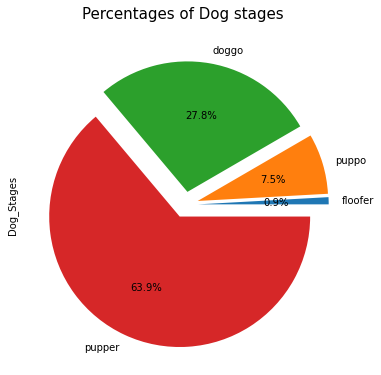

In [89]:
v_count_calulation('Dog_Stages')

#### Insights
From this plot:


1. The dog stage that has the most percentage of tweets on WeRateDogs is the pupper with a percentage of 63.9%

3. The dog stage that has the lowest percentage of tweets on WeRateDogs is the floofer.



### 2. Explore the dataset for dog breed that has the highest rating Retweet counts and tweet entries in WeRateDogs

In [90]:
#check the estimate maximum value of Dog_Breed_Predictions and  Retweet_Count for each groupr
df_breed = df.groupby('Dog_Breed_Predictions')['Retweet_Count'].max()


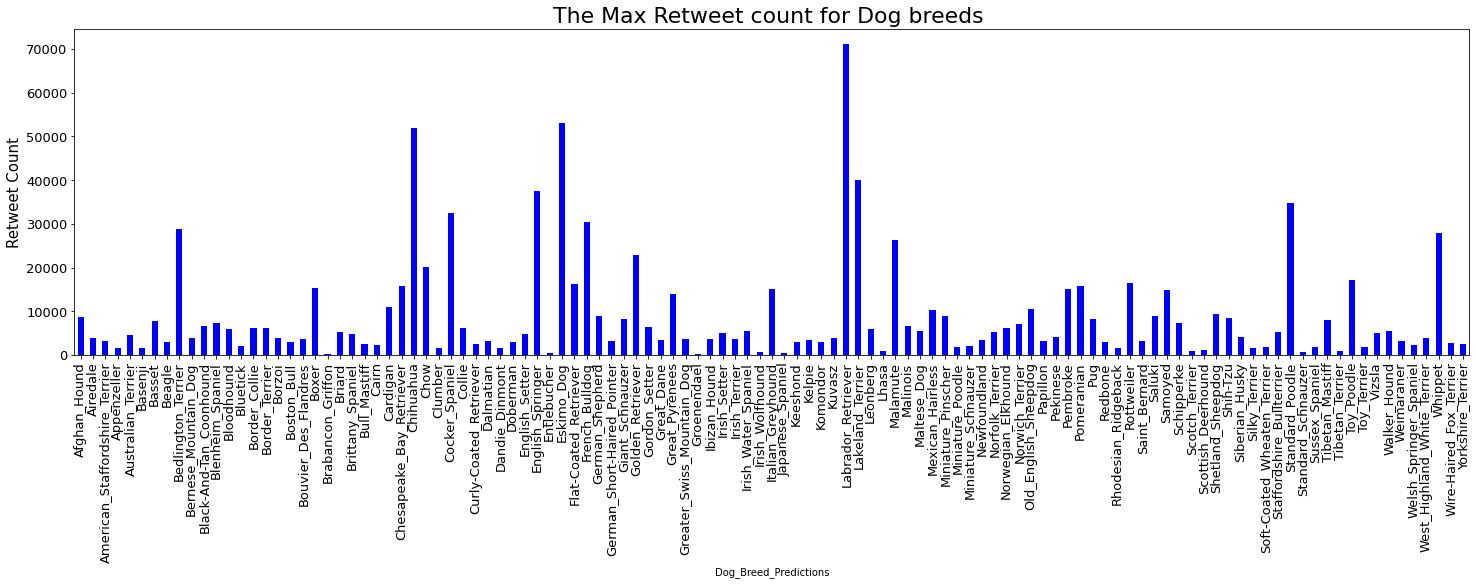

In [91]:
#Plot The Bar chart to show the 
ax = df_breed.plot(kind='bar', figsize=(25,6), color="blue", fontsize=13);
ax.set_alpha(0.11)
ax.set_title("The Max Retweet count for Dog breeds ", fontsize=22)
ax.set_ylabel("Retweet Count", fontsize=15);
plt.show()

#### Insights
From this plot:


1. The dog breed with most Retweet count is Labrador Retriever breed with a total retweet count of 315042.0 and highest retweet count of  71064.retweet and a total of 105 dog breed prediction entries.


### 3. What is relationship between the Retweet counts and the score rating


In [92]:
df['Rating_Numerator'].corr(df['Retweet_Count'])

0.27908646675030374

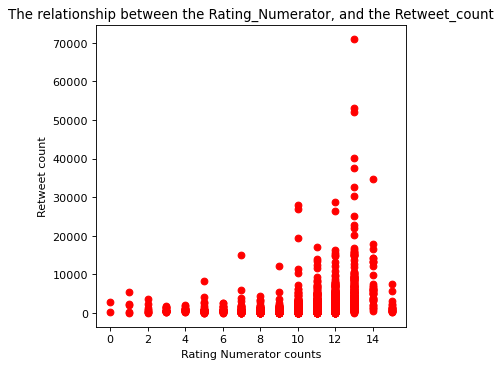

In [93]:
plt.figure(figsize=(5, 5), dpi=80)
plt.scatter(df['Rating_Numerator'],df['Retweet_Count'],color='r')
plt.title('The relationship between the Rating_Numerator, and the Retweet_count')
plt.xlabel('Rating Numerator counts')
plt.ylabel('Retweet count');

#### Insights
From this plot:


1. There is a relation between the increase in rating numerators and the number of retweet counts with rating score of 12 got the highest retweetfollowed by 10/10, 11/10, 13/10 and 9/10. This indicts that higher dog ratings had more retweet.


### 4. What is the top 30 dog breeds with the highest Ratings

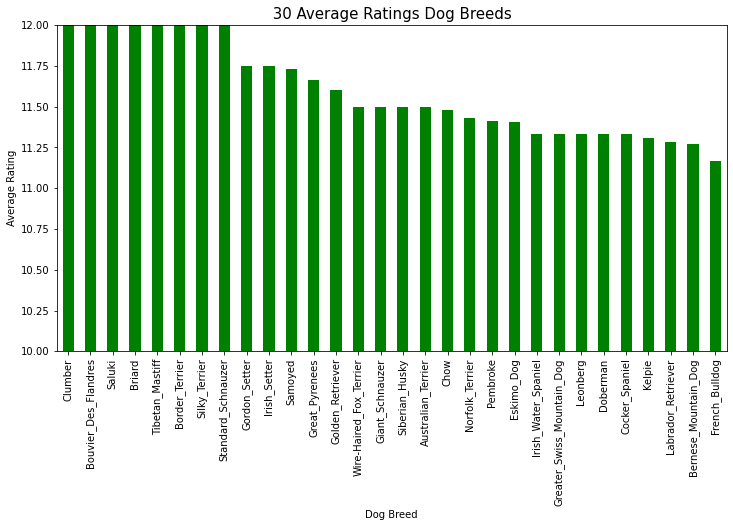

In [94]:
# plot a bar chat to show the top 30 dog breed with the highest rating scores.
fig = plt.figure(figsize=(12,6))
df.groupby('Dog_Breed_Predictions')['Rating_Numerator'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='g')
plt.title(" 30 Average Ratings Dog Breeds ",fontsize=15)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,12);

#### Insights
From this plot:


1. Clumber, Bouvier_Des_flandries, Saluki, Briand, Tibetan_Mastiff, Silky_Terrier, Standard_Schnauzer scoring 12/10, The other average top 30 breeds scores ranges from 11.75/10 to 11/10 

#### 4.

### What is the most frequent dog name used


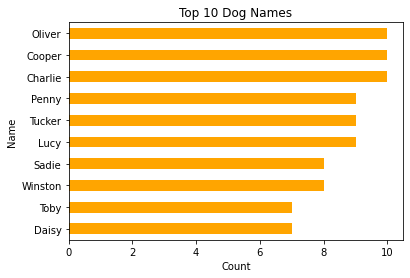

In [95]:
top_names = df['Dog_Name'].value_counts()[1:11].sort_values()
top_names.plot(kind = 'barh', color='orange')
plt.title('Top 10 Dog Names')
plt.xlabel('Count')
plt.ylabel('Name');

#### Insights
From this plot:


1. The top dog name used in most tweets are, Oliver, Cooper, Charlie
